# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/parkinsons data.csv')

df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [2]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**Data Set Information:**
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

**Attribute Information:**

Matrix column entries (attributes):

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA** - Several measures of variation in amplitude

**NHR , HNR** - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE , D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1 , spread2 , PPE** - Three nonlinear measures of fundamental frequency variation

## Matriz de correlación
### Se elimina la columna name, ya que no es una variable relevante

In [3]:
# Calcular la matriz de correlación
correlation_matrix = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','status','RPDE','DFA']].corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.1

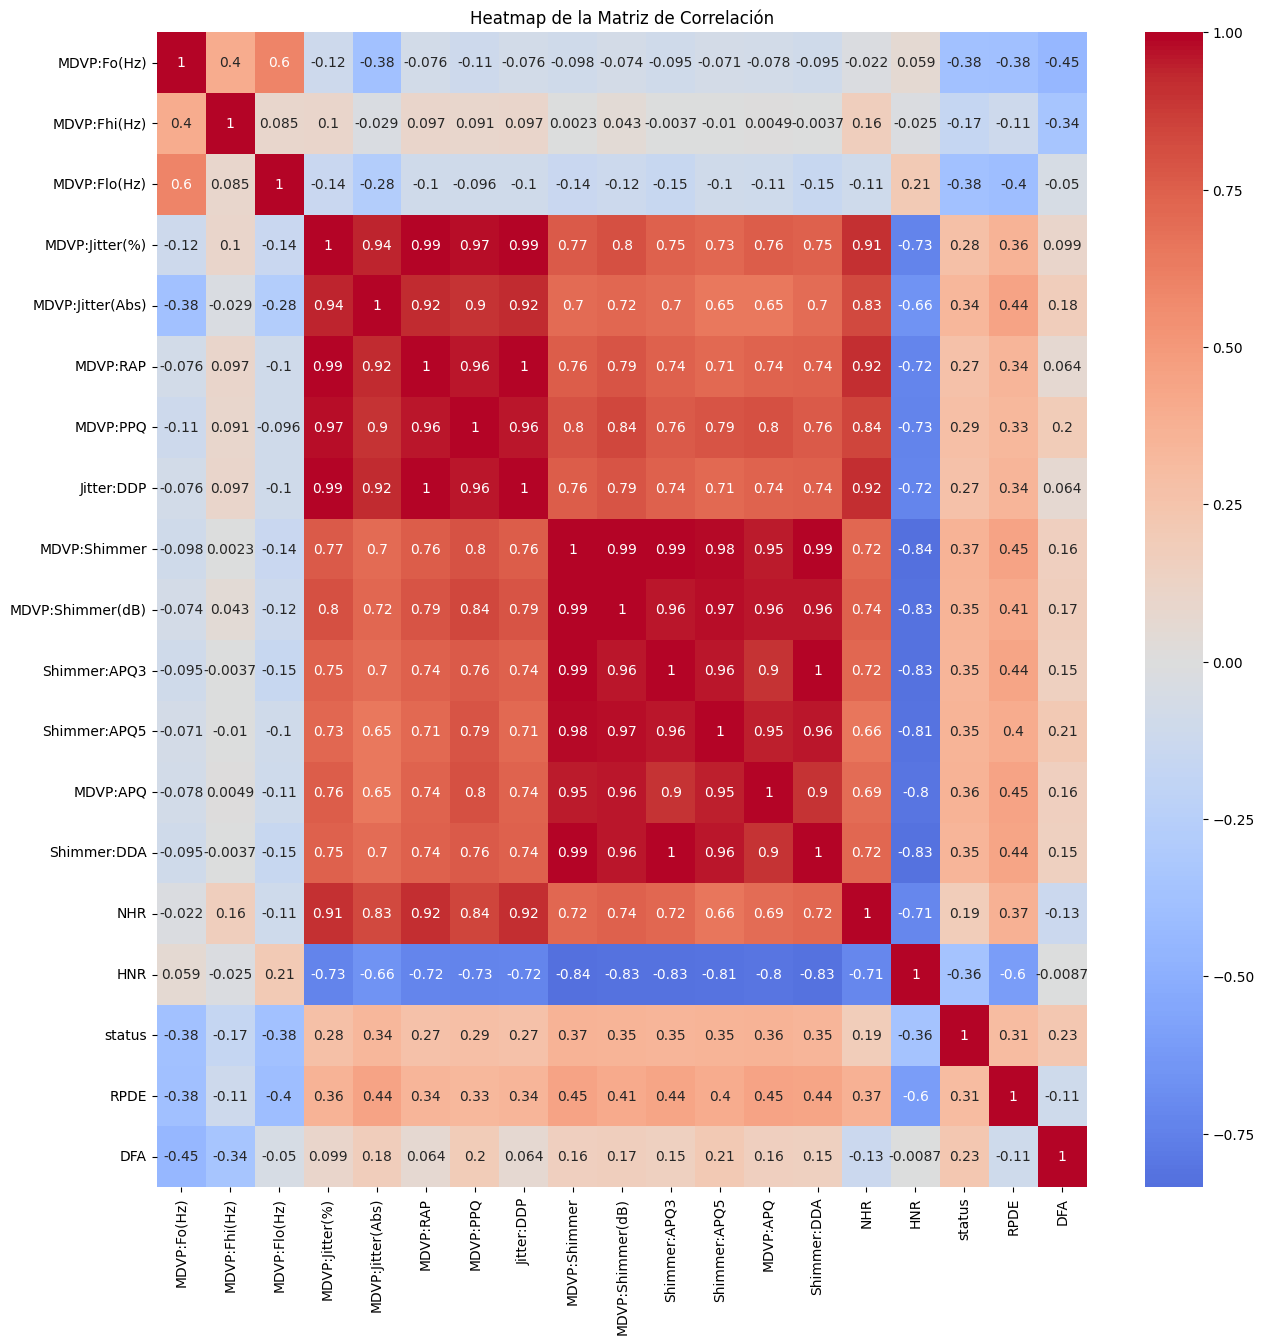

In [4]:
# Crear el mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Configurar el título del gráfico
plt.title('Heatmap de la Matriz de Correlación')

# Mostrar el gráfico
plt.show()

## Pair plot

In [ ]:
sns.pairplot(df, kind= "scatter")

Output hidden; open in https://colab.research.google.com to view.

Lista de Columnas Finales, las cuales se seleccionaron para evitar la colinealidad y solo mantener las variables independientes

**MDVP:**Fo(Hz)

**MDVP:**Fhi(Hz)

**MDVP:**Flo(Hz)

**MDVP:**Jitter(%)

**MDVP:**Shimmer

**HNR**

**RPDE**

**DFA**

**status** (como variable dependiente)

## Selección de las columnas

In [5]:
df=df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Shimmer','HNR','RPDE','DFA','status']]
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,status
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,1
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,1
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,1
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,1
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,1
...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,0
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,0
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,0
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,0


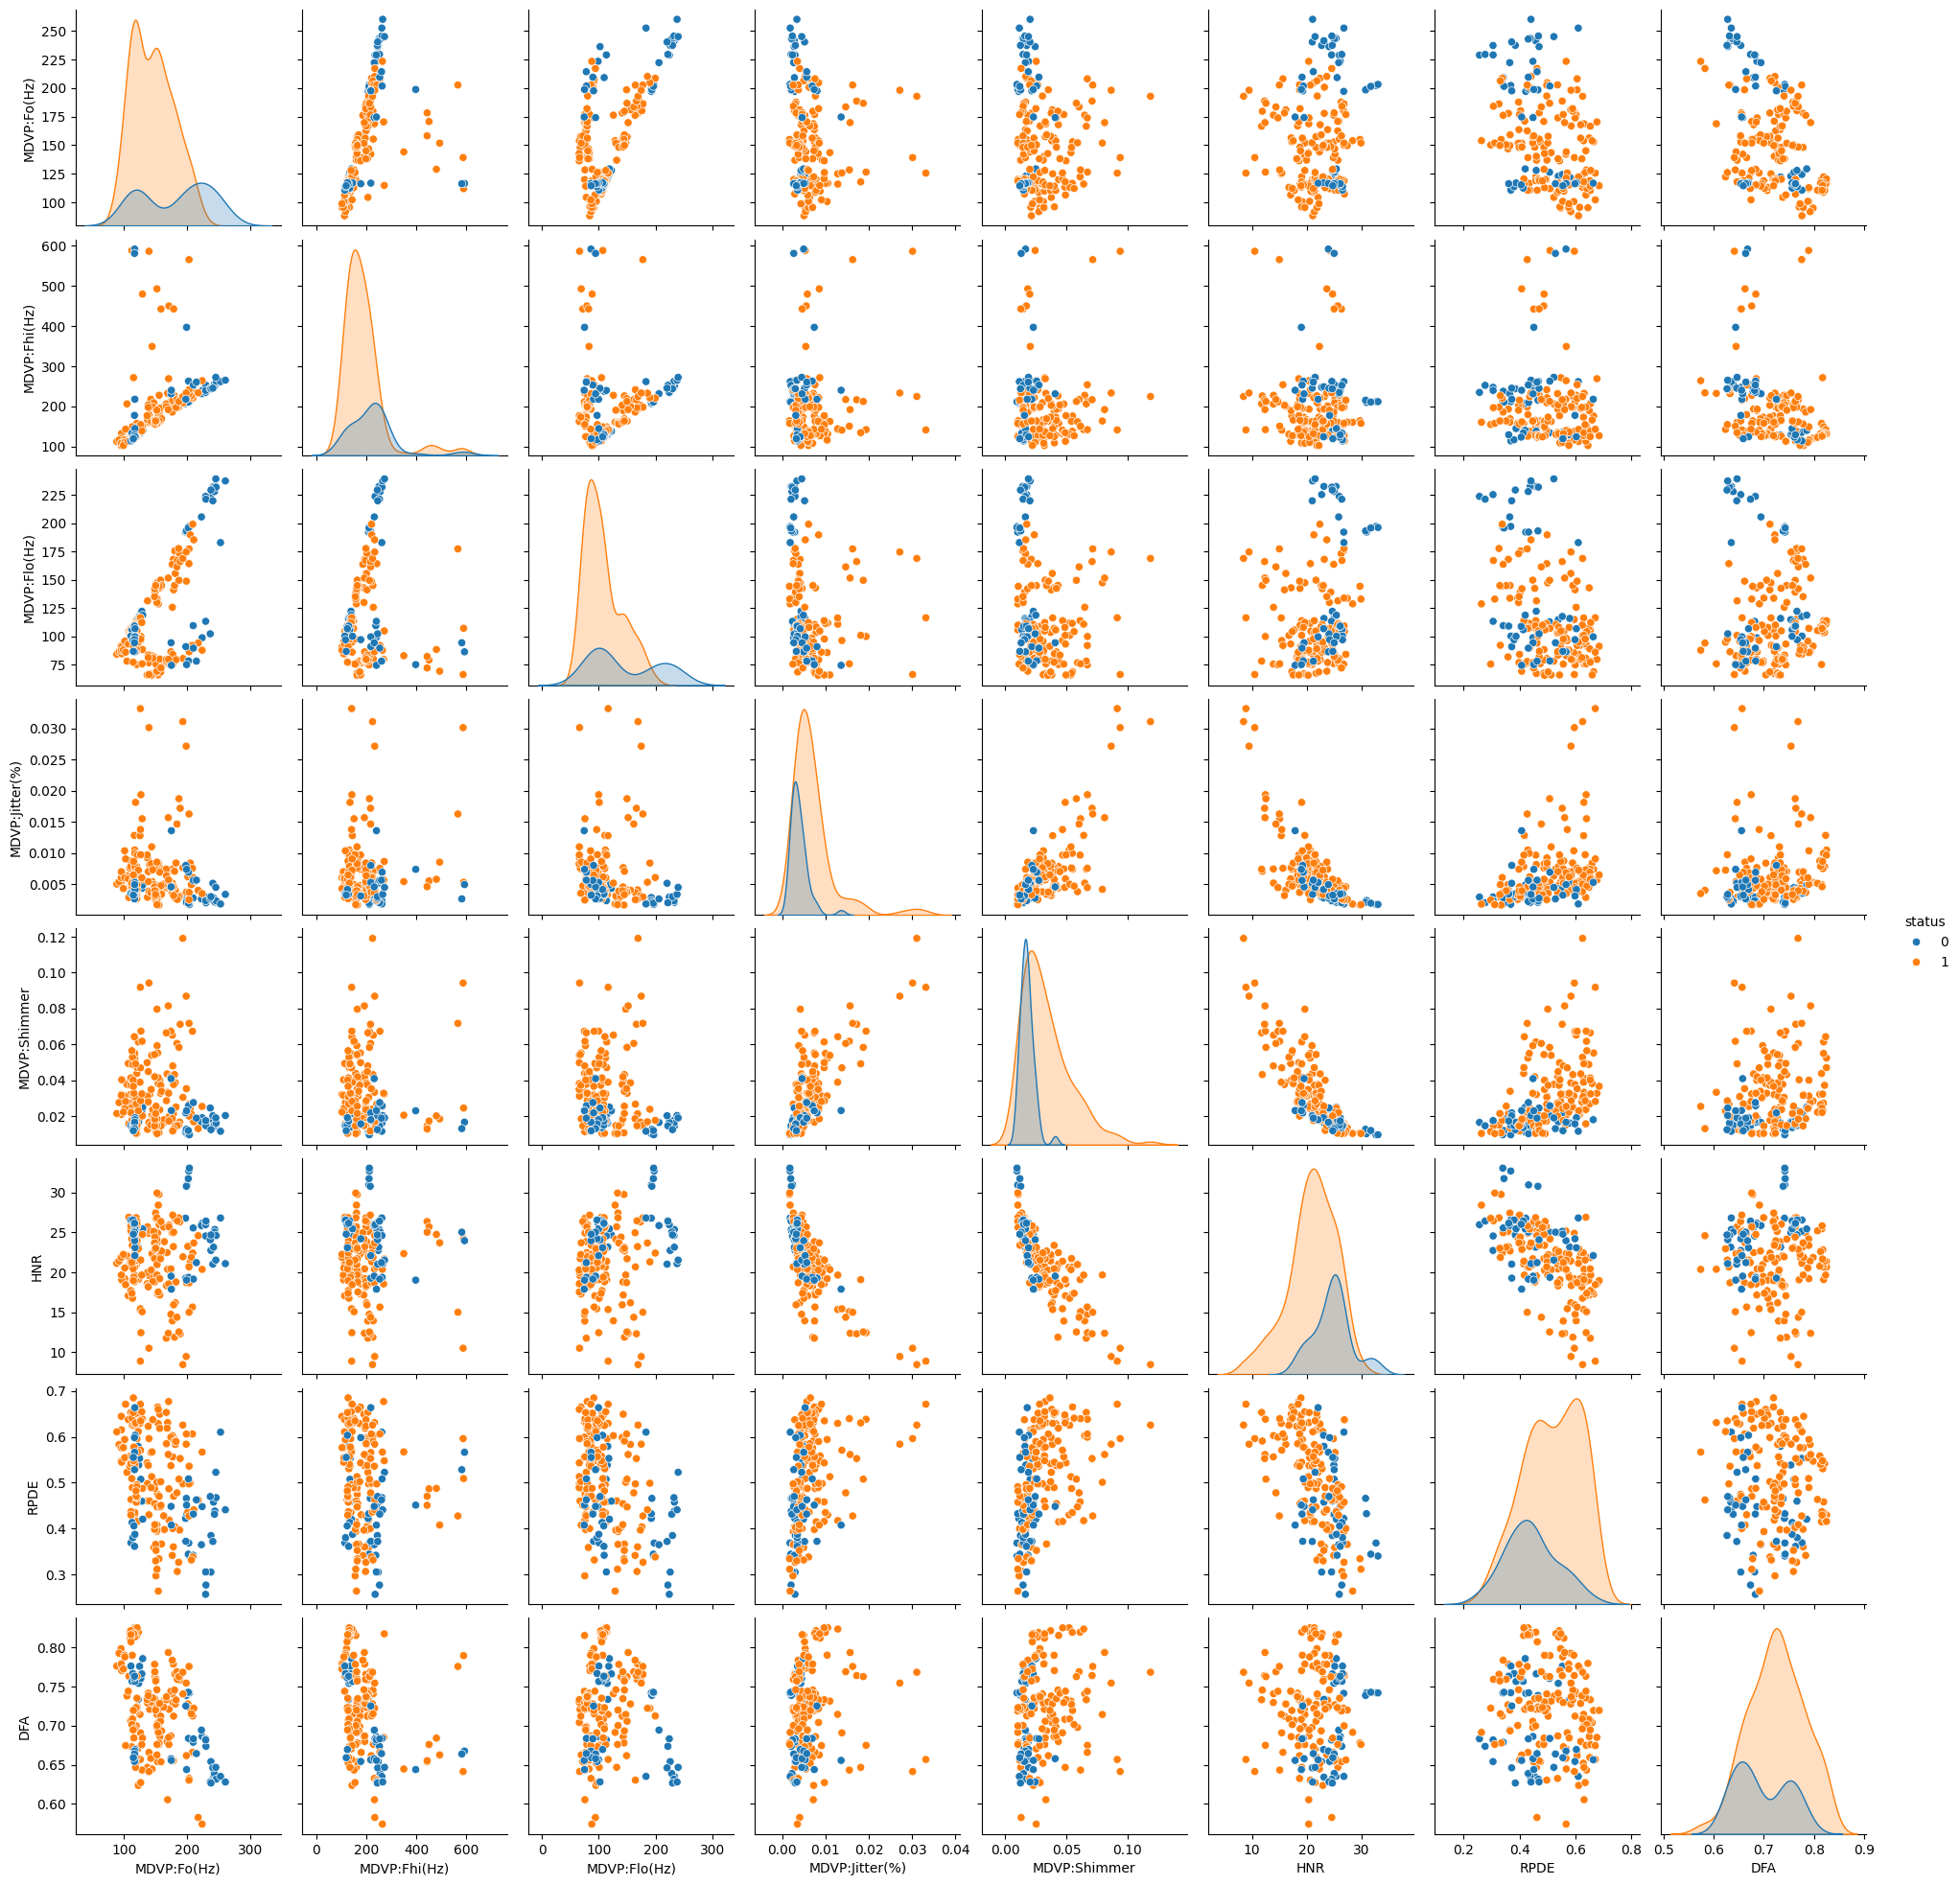

In [6]:
sns.pairplot(df, kind= "scatter", hue='status')

### se calcula de nuevo la matriz de correlación para validar que es correcta la selección de las variables

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)        1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)       0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)       0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)    -0.118003      0.102086     -0.139919        1.000000   
MDVP:Shimmer      -0.098374      0.002281     -0.144543        0.769063   
HNR                0.059144     -0.024893      0.210851       -0.728165   
RPDE              -0.383894     -0.112404     -0.400143        0.360673   
DFA               -0.446013     -0.343097     -0.050406        0.098572   
status            -0.383535     -0.166136     -0.380200        0.278220   

                MDVP:Shimmer       HNR      RPDE       DFA    status  
MDVP:Fo(Hz)        -0.098374  0.059144 -0.383894 -0.446013 -0.383535  
MDVP:Fhi(Hz)        0.002281 -0.024893 -0.112404 -0.343097 -0.166136  
MDVP:Flo(Hz)

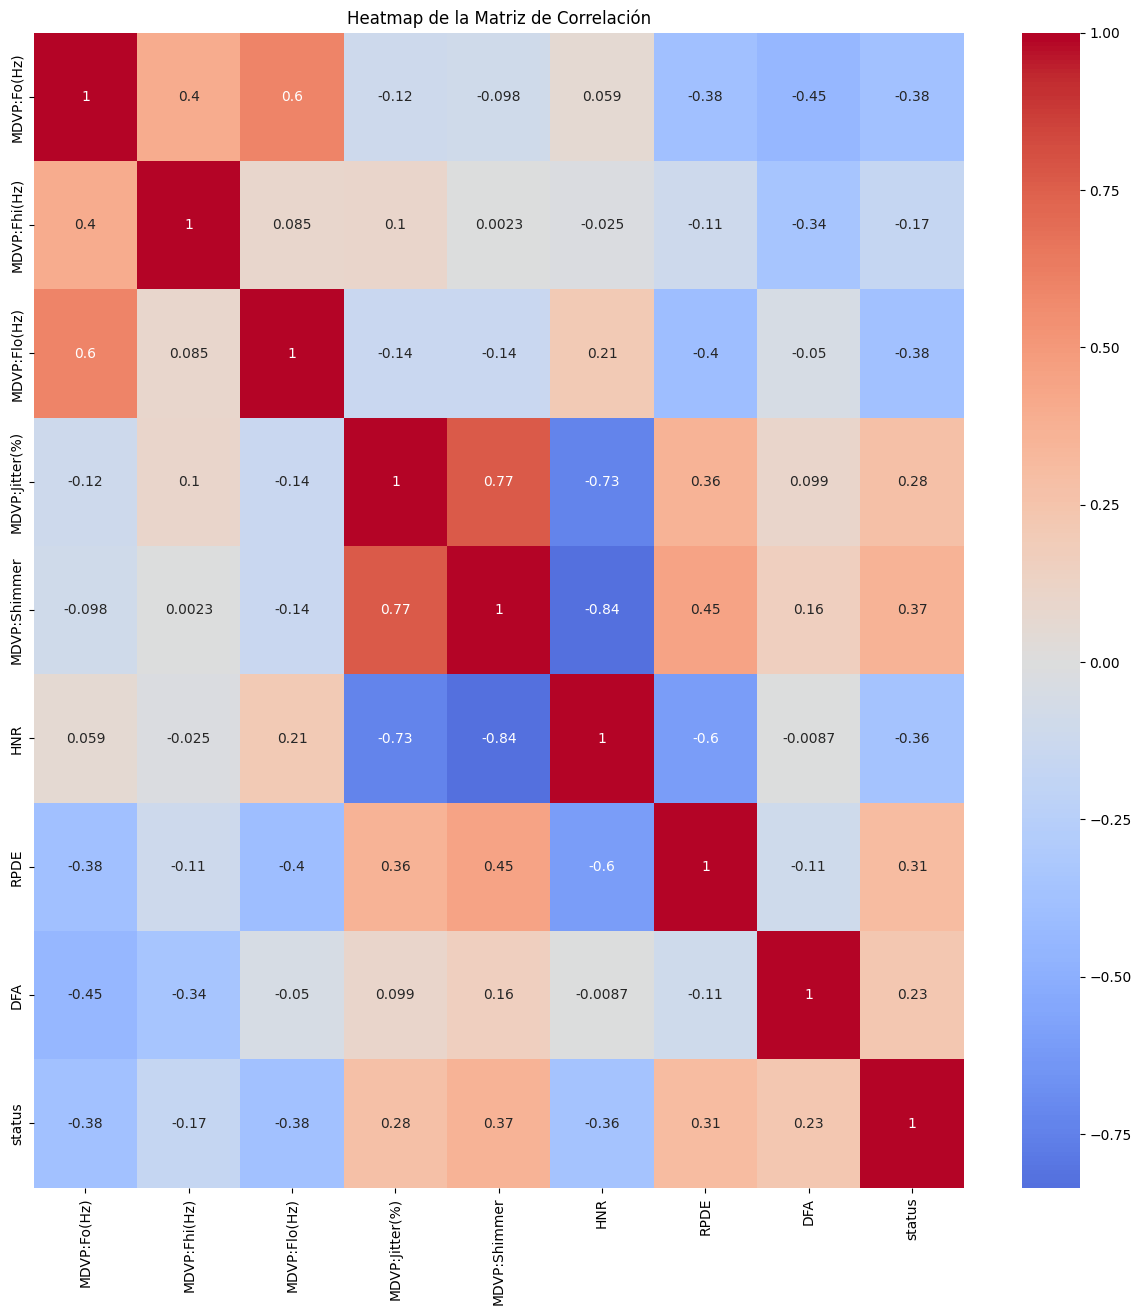

In [7]:
# Crear el mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Configurar el título del gráfico
plt.title('Heatmap de la Matriz de Correlación')

# Mostrar el gráfico
plt.show()

## Aún se evidencia cierta correlación entre varibles como HNR y MDVP:Shimmer; sin ambargo, se deciden mantener.

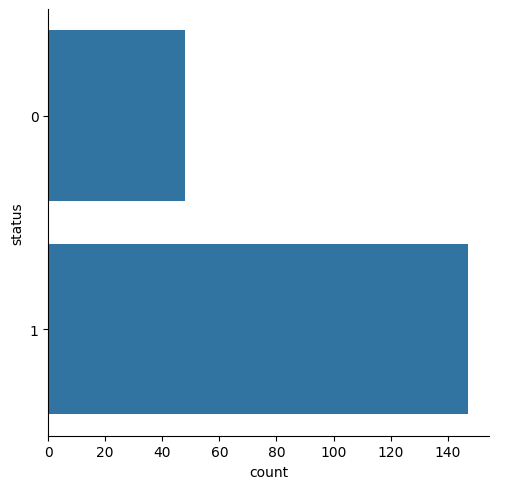

In [8]:
# Specify colors for each values of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}
# Plot a bar plot to visualize how many pumpkins of each variety are orange or white
sns.catplot(
    data=df, y="status", kind="count"
    #palette=palette,
)

# Se evidencia que la categoria de persona con la enfermedad tiene más datos.

#

# Modelo

In [9]:
from sklearn.model_selection import train_test_split
# X is the encoded features
X = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Shimmer','HNR','RPDE','DFA']]
# y is the encoded label
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

Predicted labels:  [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 1]
F1-score:  0.9152542372881356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Resultados

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(y_test, predictions)
classes = np.unique(y_test)
total_tp=0
total_tn=0
total_fp=0
total_fn=0
for cls in classes:
    tp = conf_matrix[cls, cls]
    total_tp += tp
    fp = conf_matrix[:, cls].sum() - tp
    total_fp += fp
    fn = conf_matrix[cls, :].sum() - tp
    total_fn += fn
    tn = conf_matrix.sum() - (tp + fp + fn)
    total_tn += tn

    print(f"Clase {cls}: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(total_tp, total_tn, total_fp, total_fn)

Clase 0: TP=7, TN=27, FP=2, FN=3
Clase 1: TP=27, TN=7, FP=3, FN=2
34 34 5 5


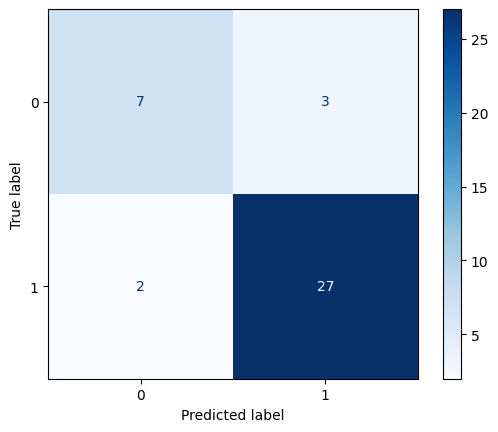

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [13]:
def matriz_confusion(y_true, y_pred):
    TP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 1)
    TN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp == 0)
    FP = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
    FN = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)
    return float(TP), float(TN), float(FP), float(FN)

def exactitud(TP, TN, FP, FN):
    total = TP + TN + FP + FN
    return (TP + TN) / total if total else 0.0

def precision(TP, FP):
    return TP / (TP + FP) if (TP + FP) else 0.0

def recall(TP, FN):
    return TP / (TP + FN) if (TP + FN) else 0.0

def puntuacion_f1(TP, FP, FN):
    prec = precision(TP, FP)
    sens = sensibilidad(TP, FN)
    return 2.0 * (prec * sens) / (prec + sens) if (prec + sens) else 0.0


def sensibilidad(TP, FN):
    return TP / (TP + FN) if (TP + FN) else 0.0

def especificidad(TN, FP):
    return TN / (TN + FP) if (TN + FP) else 0.0

In [14]:

TP, TN, FP, FN = matriz_confusion(y_test, predictions)

# Calcular métricas
acc = exactitud(TP, TN, FP, FN)
prec = precision(TP, FP)
sens = sensibilidad(TP, FN)
spec = especificidad(TN, FP)
f1 = puntuacion_f1(TP, FP, FN)

print("Matriz de confusión:")
print(f"TP: {TP}")
print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")

print(f"Exactitud (Accuracy): {acc:.2f}")
print(f"Precisión (Precision): {prec:.2f}")
print(f"Sensibilidad (Recall): {sens:.2f}")
print(f"Especificidad (Specificity): {spec:.2f}")
print(f"Puntuación F1 (F1 Score): {f1:.2f}")

Matriz de confusión:
TP: 27.0
TN: 7.0
FP: 3.0
FN: 2.0
Exactitud (Accuracy): 0.87
Precisión (Precision): 0.90
Sensibilidad (Recall): 0.93
Especificidad (Specificity): 0.70
Puntuación F1 (F1 Score): 0.92


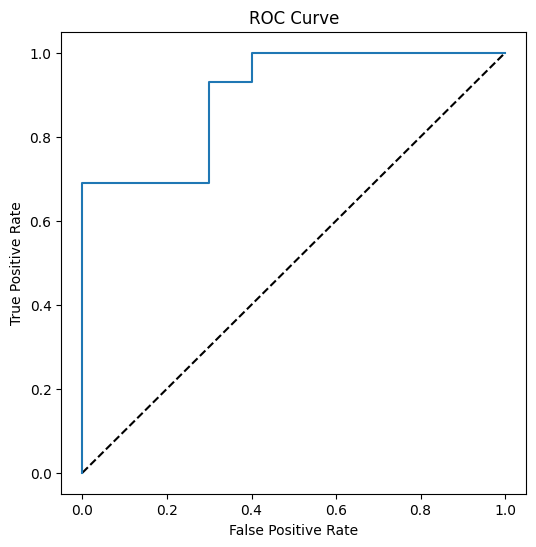

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Los resultados muestran que el modelo tiene una buena predicción en la categoria de las personas enfermas; sin embargo, el dataset está desbalanceado. Esto también puede causar predicciones incorrectas

In [16]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9
